![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

## Import required libraries

In [1]:
import pandas as pd
from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

## Load train and test dataset

In [17]:
train_df = pd.read_csv("data/house_price_train.csv")
test_df = pd.read_csv("data/house_price_test.csv")

In [18]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
print("\nThe train data size after dropping Id feature is : {} ".format(train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test_df.shape))


The train data size after dropping Id feature is : (1460, 81) 
The test data size after dropping Id feature is : (1459, 80) 


In [20]:
X_train = train_df.drop(['SalePrice'],axis=1)
y_train = train_df['SalePrice']

## Basic EDA and model training

#### Want to do basic EDA?
- AutoML contains automated Exploratory data analysis for input data, by default it performs and saved the automated eda report for the given training dataset. For more details check [here](https://supervised.mljar.com/features/eda/)


- The model training is done using `AutoML.fit()` method, you can control the and select the algorithms to be used and the training time etc, please refer [docs](https://supervised.mljar.com/features/automl/) here for more details.

#### Want to do automated feature engineering?
  mljar provides [golden features](https://supervised.mljar.com/features/automl/#golden_features)
- Golden Features are new features constructed from original data which have great predictive power. Set the `golden_features` parameter to `True` and see if work.

#### What to do cross-validation?
specify your cross-validation strategy in `validation_stategy` parameter in AutoML.

#### What to do ML Explainability? 
AutoML provides feature importances and SHAP value explanations for tree based models. This is controlled by `explain_level` parameter in AutoML. Refer [docs](https://supervised.mljar.com/features/explain/) for more information.

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Xgboost']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'golden_features', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model
1_Default_Xgboost rmse 35006.549577 trained in 248.85 seconds
Skip golden_features because of the time limit.
* Step ensemble will try to check up to 1 model
AutoML fit time: 268.19 seconds


AutoML(algorithms=['Xgboost'], explain_level=2, golden_features=True,
       total_time_limit=30,
       validation_strategy={'k_folds': 3, 'shuffle': False, 'stratify': True,
                            'validation_type': 'kfold'})

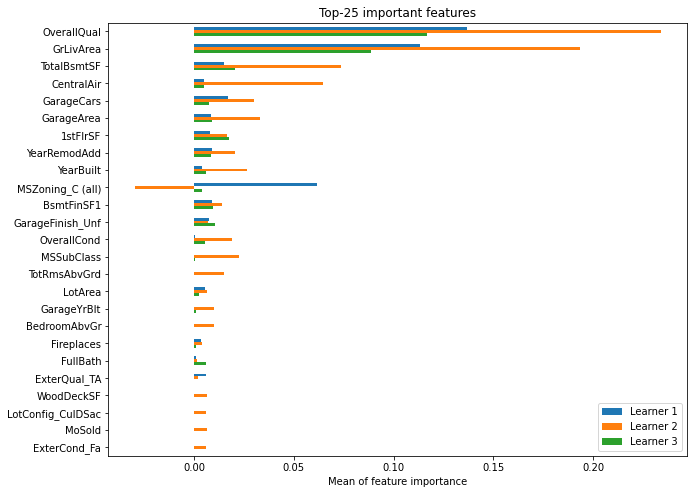

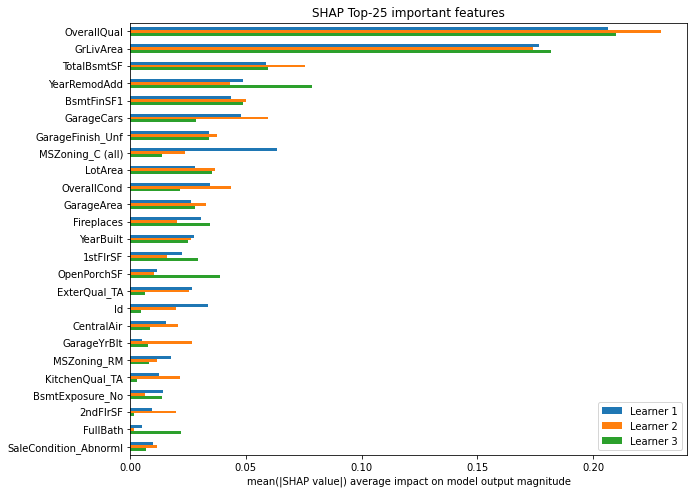

In [22]:
a = AutoML(algorithms=['Xgboost'],total_time_limit=30,
           explain_level=2,golden_features=True,
           validation_strategy={
            "validation_type": "kfold",
            "k_folds": 3,
            "shuffle": False,
            "stratify": True,
            })
a.fit(X_train,y_train)

## Predict on test

In [23]:
predictions = a.predict(test_df)
submission = pd.read_csv("data/sample_submission.csv")
submission['SalePrice'] = predictions
submission.head()

,Id,SalePrice
0,1461,131471.114583
1,1462,150359.666667
2,1463,176860.968750
3,1464,183515.338542
4,1465,199703.973958
